# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
print(os.listdir("../input"))
import torchvision.models as models

['yes', 'brain_tumor_dataset', 'no']


# Reading the dataset

In [2]:
DATA_DIR='../input/brain_tumor_dataset'

In [3]:
os.listdir(f'{DATA_DIR}')

['yes', 'no']

In [27]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.3,
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  size=224,bs=24, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')

Classes: 
 ['no', 'yes']


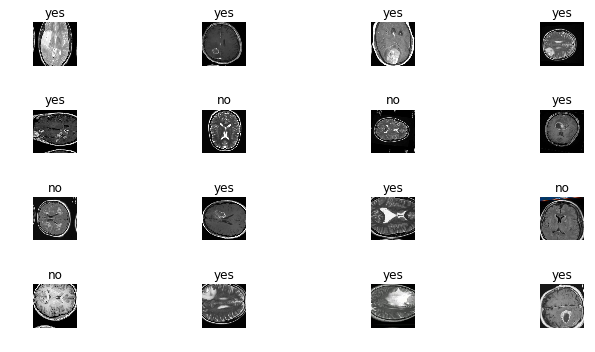

In [54]:
data.show_batch(rows=4, figsize=(8,8))

In [38]:
learner = create_cnn(data, models.vgg16, metrics=[accuracy], callback_fns=ShowGraph,  model_dir="/tmp/model/")

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


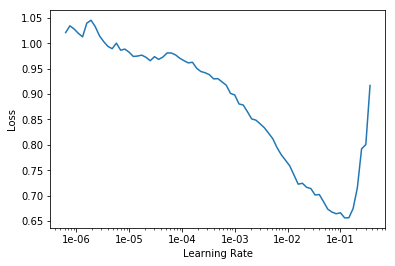

In [31]:
learner.lr_find()
learner.recorder.plot()


epoch,train_loss,valid_loss,accuracy,time
0,0.802675,0.454149,0.773333,00:03
1,0.735773,0.310170,0.866667,00:03
2,0.591421,0.265334,0.906667,00:03
3,0.555581,0.321732,0.880000,00:03
4,0.494803,0.324660,0.880000,00:03
5,0.456317,0.277358,0.866667,00:03
6,0.440347,0.278215,0.866667,00:03
7,0.407057,0.292924,0.866667,00:04
8,0.369834,0.253235,0.893333,00:03
9,0.357763,0.252117,0.906667,00:03


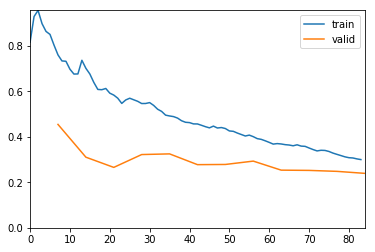

In [39]:
learner.fit_one_cycle(12, max_lr=slice(1e-02))

In [41]:
learner.save('/kaggle/working/stage-1')

In [42]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


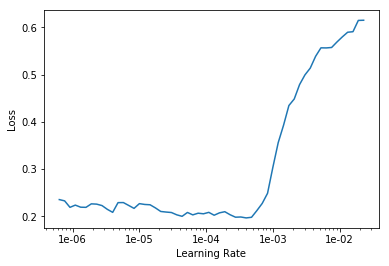

In [43]:
learner.lr_find()
learner.recorder.plot()

In [45]:
learner.load('/kaggle/working/stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,yes,yes,yes,yes
Path: ../input/brain_tumor_dataset;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,yes,yes,yes,no
Path: ../input/brain_tumor_dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

epoch,train_loss,valid_loss,accuracy,time
0,0.256503,0.237029,0.920000,00:04
1,0.245899,0.226825,0.920000,00:04
2,0.216539,0.227001,0.920000,00:04
3,0.193629,0.227553,0.933333,00:04


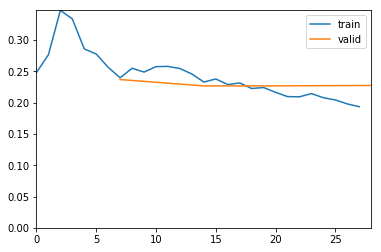

In [46]:
learner.fit_one_cycle(4,max_lr=slice(1e-04))

In [47]:
learner.save('/kaggle/working/stage-2')

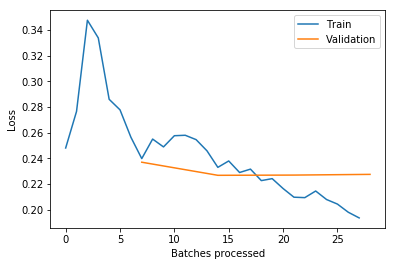

In [48]:
learner.recorder.plot_losses()

In [49]:
interp = ClassificationInterpretation.from_learner(learner)

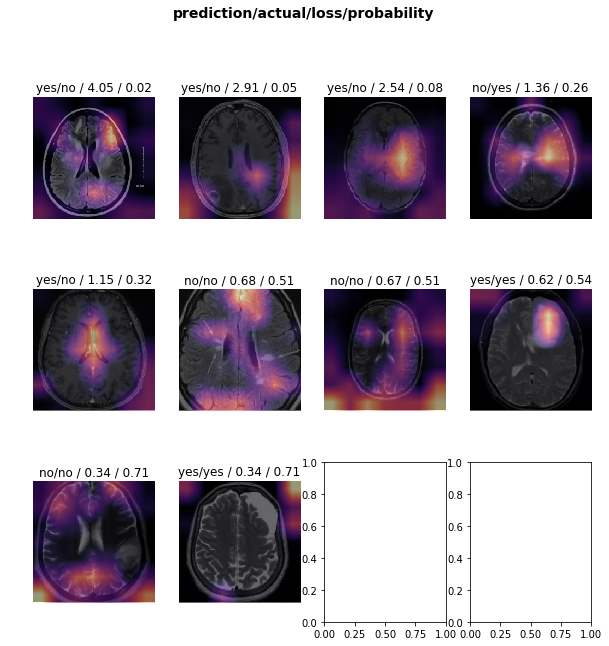

In [52]:
interp.plot_top_losses(10, figsize=(10,10))

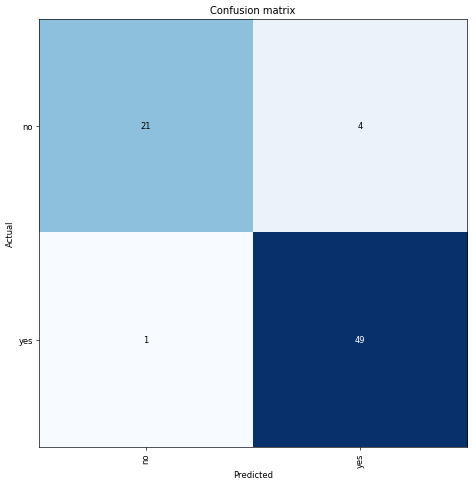

In [53]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)